In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
drinks = pd.read_csv("../../Documents/Data/drinks.csv", encoding="utf-8")
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [21]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [22]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [23]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [24]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [25]:
cols = ['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent']

In [26]:
corr = drinks[cols].corr(method='pearson')

In [27]:
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

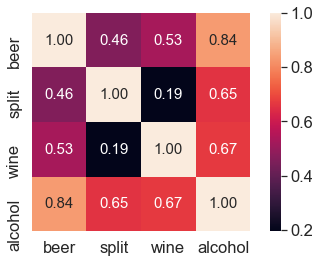

In [29]:
import seaborn as sns

cols_view = ['beer', 'split', 'wine', 'alcohol']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                    cbar=True,
                    annot=True,
                    square=True,
                    fmt='.2f',
                    annot_kws={'size': 15},
                    yticklabels=cols_view,
                    xticklabels=cols_view)
plt.tight_layout()
plt.show

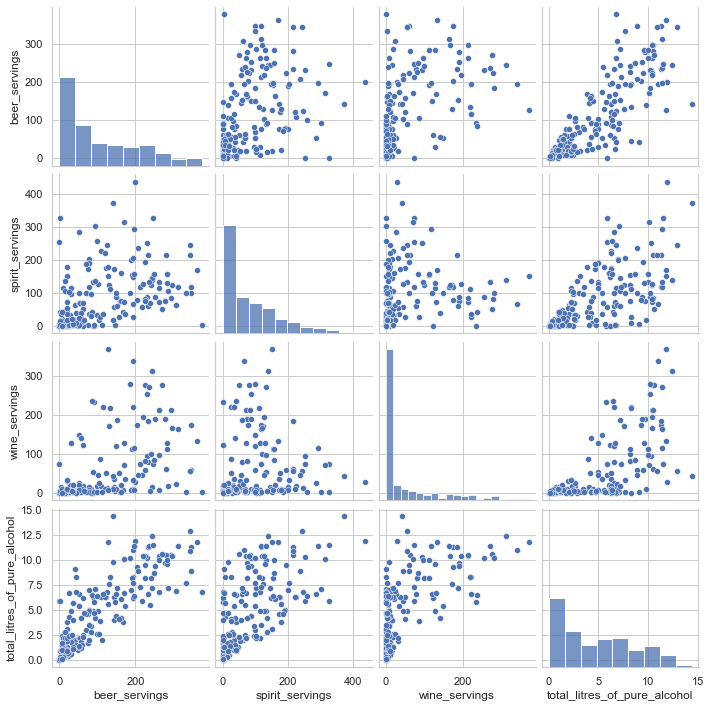

In [32]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [33]:
drinks['continent'] = drinks['continent'].fillna('OT')

In [35]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [42]:
drinks['beer_servings'].idxmax()

117

In [45]:
result = drinks.groupby("continent").wine_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


In [52]:
result['mean']

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: mean, dtype: float64

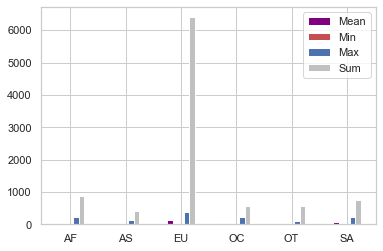

In [71]:
index = np.arange(len(result.index))
width = 0.1

rect1 = plt.bar(index - 2*width, result['mean'], width=width, color='purple', label='Mean')

rect2 = plt.bar(index - width, result['min'], width=width, color='r', label='Min')

rect3 = plt.bar(index + width, result['max'], width=width, color='b', label='Max')

rect4 = plt.bar(index + 2*width, result['sum'], width=width, color='silver', label='Sum')


plt.xticks(index, result.index)
plt.legend()
plt.show()

In [99]:
q1 = drinks.groupby('continent')['total_litres_of_pure_alcohol','beer_servings'].agg(['sum'])
q1

<ipython-input-99-f04866e72505>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  q1 = drinks.groupby('continent')['total_litres_of_pure_alcohol','beer_servings'].agg(['sum'])


,total_litres_of_pure_alcohol,beer_servings
,sum,sum
continent,,
AF,159.4,3258
AS,95.5,1630
EU,387.8,8720
OC,54.1,1435
OT,137.9,3345
SA,75.7,2101


In [103]:
q2 = drinks.groupby('continent').wine_servings.agg(['mean'])
q2

,mean
continent,
AF,16.264151
AS,9.068182
EU,142.222222
OC,35.625000
OT,24.521739
SA,62.416667


In [146]:
c = 0
print("전체 평균보다 많은 와인을 마시는 나라는 다음과 같다.")
for i in range(len(q2.index)) :
    if q2['mean'][i]>= q2.mean().values :
        c = c +1
        print(q2.index[i]+ "의 와인소비량 평균은 :" + str(q2['mean'][i]))
print("총 " + str(c) + "개의 나라")

전체 평균보다 많은 와인을 마시는 나라는 다음과 같다.
EU의 와인소비량 평균은 :142.22222222222223
SA의 와인소비량 평균은 :62.416666666666664
총 2개의 나라


In [149]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

In [150]:
from scipy import stats

In [153]:
stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)